# ch05.05. 기초모델 구현 - Adaline
---

* 날짜: 2022-05-15
* 이름: 고민수

## 학습내용
    - 이진 분류 개념에 대해 이해한다.
    - Adaline 프로세스를 이해한다. 
    - Adaline 알고리즘을 구현한다.
    - 경사하강법에 대해 이해한다.
    
## 특징
    - 이진 분류에 사용한다.
    - Gradient Descent

```
import numpy as np
import matplotlib.pyplot as plt
```

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## 클래스 작성
---

In [36]:
X_train.shape

(75, 4)

In [ ]:
lr = [ 0.01,0.001,0.0001]
        size = X.shape[1]
        self.w = self.seed.normal(0,0.01,size = size+1


In [42]:
class AdalineGD():
    
    def __init__(self, lr=0.001, random_state=1):
        self.lr=lr
        self.seed = np.random.RandomState(random_state)

    def init_weights(self, X):
        size = X.shape[1]
        self.w = self.seed.normal(0,0.01,size = size+1)   # np.random.normal(location(위치), 편차, size = size)

    def model(self, X):
        return np.dot(X, self.w[:-1]) + self.w[-1] # 편향(bias) 전 w값들과 X의 내적 + bias의 값

    def predict(self, X):
        y_hat = self.model(X)
        logit = np.where(y_hat >= 0.5, 1, 0)
        return logit

    def loss(self, y, y_hat):
        Loss = (y-y_hat)**2
        Loss = np.sum(Loss[:-1])
        return 0.5*Loss

    def accuracy(self, y, y_logit):
        return np.count_nonzero(y==y_logit)/len(y)

    def evaluate(self, X, y):
        y_hat = self.model(X)
        y_logit = self.predict(X)
        
        loss = self.loss(y, y_hat) / len(y) # 손실평균
        acc = self.accuracy(y, y_logit)    # 정확도
        return loss, acc

    def fit(self, X, y, epochs=10, show_params=False):

        self.init_weights(X) # 가중치 초기화
        self.history=dict(loss=[], acc=[]) # history 초기화

        for epoch in range(epochs):
            # 최적화
            y_hat = self.model(X)
            self.w[:-1] = self.w[:-1] + self.lr * np.dot(X.T , (y-y_hat))
            self.w[-1] = self.w[-1] + self.lr * np.sum(y-y_hat)

            # 평가 및 결과 저장
            loss, acc = self.evaluate(X, y)
            self.history['loss'].append(loss)
            self.history['acc'].append(acc)
            print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
            if show_params: print(self.w)

    # 데이터 흐름 시각화
    def draw_dflow(self, X, y, title='', figsize=(8,4)):
        y_hat = self.model(X)
        y_pred = self.predict(X)

        plt.figure(figsize=figsize)
        plt.title(title)
        plt.plot(y, label='y', marker='o')
        plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
        plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
        plt.legend()
        plt.show()

    # 학습 곡선 시각화
    def draw_lcurve(self, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.plot(self.history['acc'], label='acc', marker='o')
        plt.plot(self.history['loss'], label='loss', marker='o')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()

## Iris 데이터로 분류 진행
---

### **데이터 로드**

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def iris_loader(c_1, c_not1, test_size=0.2, rs=1):
    iris = load_iris()
    X = iris.data
    y = iris.target

    X = X[y!=2]
    y = y[y!=2]
    y = np.where(y==1, c_1, c_not1)
    print(X.shape, y.shape, X[0], y[0])

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=rs)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = iris_loader(1, 0)

(100, 4) (100,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


### **학습전 성능 평가**

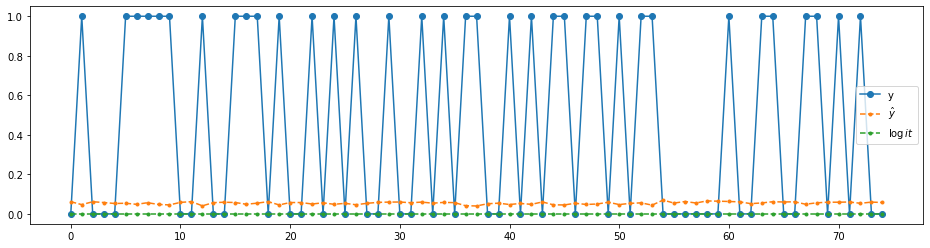

성능:  (0.21106123257484402, 0.5333333333333333)


In [44]:
model = AdalineGD(lr=0.0001)

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [45]:
history = model.fit(X_train, y_train, epochs=20)

[Epoch 0] loss: 0.17  acc: 0.53
[Epoch 1] loss: 0.13  acc: 0.53
[Epoch 2] loss: 0.1  acc: 0.53
[Epoch 3] loss: 0.09  acc: 0.73
[Epoch 4] loss: 0.09  acc: 0.91
[Epoch 5] loss: 0.09  acc: 0.96
[Epoch 6] loss: 0.08  acc: 0.96
[Epoch 7] loss: 0.08  acc: 0.96
[Epoch 8] loss: 0.08  acc: 0.96
[Epoch 9] loss: 0.08  acc: 0.99
[Epoch 10] loss: 0.07  acc: 1.0
[Epoch 11] loss: 0.07  acc: 1.0
[Epoch 12] loss: 0.07  acc: 1.0
[Epoch 13] loss: 0.07  acc: 1.0
[Epoch 14] loss: 0.07  acc: 1.0
[Epoch 15] loss: 0.06  acc: 1.0
[Epoch 16] loss: 0.06  acc: 1.0
[Epoch 17] loss: 0.06  acc: 1.0
[Epoch 18] loss: 0.06  acc: 1.0
[Epoch 19] loss: 0.06  acc: 1.0


### **학습 후 성능평가**

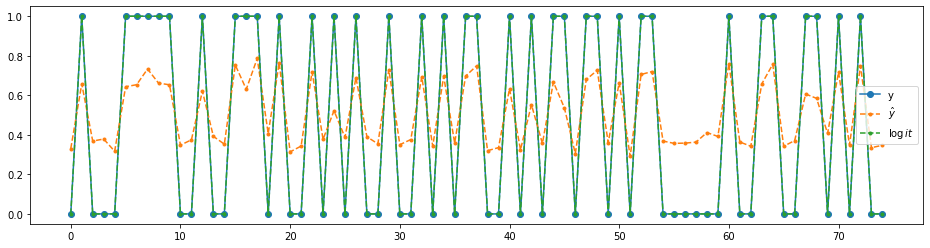

In [46]:
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

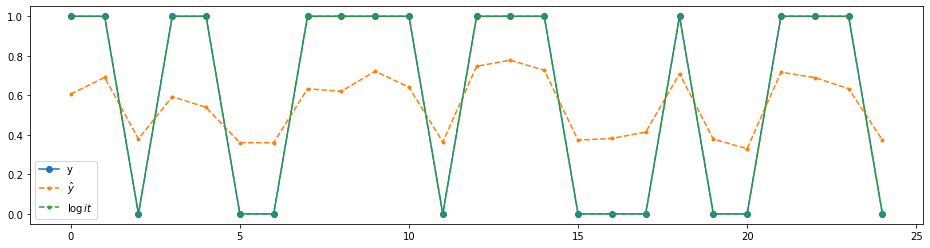

In [47]:
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **학습곡선**

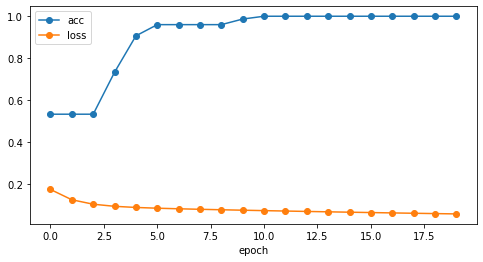

In [48]:
model.draw_lcurve()

### **하이퍼파라미터에 따른 성능평가**

In [49]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
    model = AdalineGD(lr=lr)
    history = model.fit(X_train, y_train, epochs=10)
    print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.2  acc: 0.53
[Epoch 1] loss: 0.19  acc: 0.53
[Epoch 2] loss: 0.19  acc: 0.53
[Epoch 3] loss: 0.18  acc: 0.53
[Epoch 4] loss: 0.17  acc: 0.53
[Epoch 5] loss: 0.17  acc: 0.53
[Epoch 6] loss: 0.16  acc: 0.53
[Epoch 7] loss: 0.16  acc: 0.53
[Epoch 8] loss: 0.15  acc: 0.53
[Epoch 9] loss: 0.15  acc: 0.53
===== lr 1e-05 ==== (0.18736088599068126, 0.4)
[Epoch 0] loss: 0.14  acc: 0.53
[Epoch 1] loss: 0.11  acc: 0.53
[Epoch 2] loss: 0.1  acc: 0.63
[Epoch 3] loss: 0.09  acc: 0.85
[Epoch 4] loss: 0.09  acc: 0.95
[Epoch 5] loss: 0.08  acc: 0.96
[Epoch 6] loss: 0.08  acc: 0.96
[Epoch 7] loss: 0.08  acc: 0.97
[Epoch 8] loss: 0.08  acc: 1.0
[Epoch 9] loss: 0.08  acc: 1.0
===== lr 0.0001 ==== (0.07473614027516257, 1.0)
[Epoch 0] loss: 0.87  acc: 0.47
[Epoch 1] loss: 5.85  acc: 0.53
[Epoch 2] loss: 41.85  acc: 0.47
[Epoch 3] loss: 303.07  acc: 0.53
[Epoch 4] loss: 2193.74  acc: 0.47
[Epoch 5] loss: 15886.66  acc: 0.53
[Epoch 6] loss: 115035.99  acc: 0.47
[Epoch 7] loss: 833010.73  acc

* 학습률이 0.0001 일때 성능이 가장 좋다